### 1. Importación de Librerías

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


### 2. Cargar Dataset

In [18]:
# Carga el conjunto de datos Breast Cancer
dataset = load_breast_cancer()
X = dataset.data # 569x30
y = dataset.target # 569x1

### 3. Dividir Datos de Entranamiento y Pruebas

In [19]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Normalizar Datos

In [20]:
# Normaliza los datos para que todas las características tengan una escala similar
scaler = MinMaxScaler(feature_range=(0,1)) # [0, 1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5. Crear y entrenar Modelo RNA

In [21]:
# Crea y entrena el modelo RNA
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#opt = Adam(lr = 1e-2) # by default lr=1e-3
opt = Adam(learning_rate=1e-2)
model.compile(loss='binary_crossentropy',  optimizer=opt, metrics=['accuracy'])
# Configurar early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', 
    patience=10, 
    restore_best_weights=True)

history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

/home/walmache/MEGA/autoCapacitacion/Maestria-IA/gitHub/MaestriaIA-UHE/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5951 - loss: 0.7046 - val_accuracy: 0.8509 - val_loss: 0.5467
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8104 - loss: 0.5419 - val_accuracy: 0.9211 - val_loss: 0.3902
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8783 - loss: 0.3902 - val_accuracy: 0.9474 - val_loss: 0.2880
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8962 - loss: 0.3169 - val_accuracy: 0.9211 - val_loss: 0.2294
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9114 - loss: 0.2750 - val_accuracy: 0.9474 - val_loss: 0.1979
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8976 - loss: 0.2634 - val_accuracy: 0.9474 - val_loss: 0.1681
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9293 - loss: 0.2066 - val_accuracy: 0.9474 - val_loss: 0.1499
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8896 - loss: 0.2287 - val_accuracy: 0.9649 - 

### 6. Predicciones

In [22]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x738d482a9120> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


### 7. Salidas en etiquetas binarias (0 o 1) / informe de evaluación / métricas

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

confusion matrix: 
 [[42  1]
 [ 1 70]]


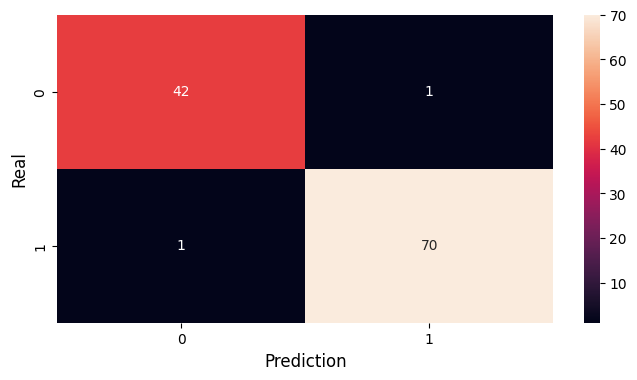

accuracy:  0.9824561403508771
recall:  0.9859154929577465
precision:  0.9859154929577465
specificity:  0.9767441860465116
f1 score:  0.9859154929577465
auc:  0.9813298395021289


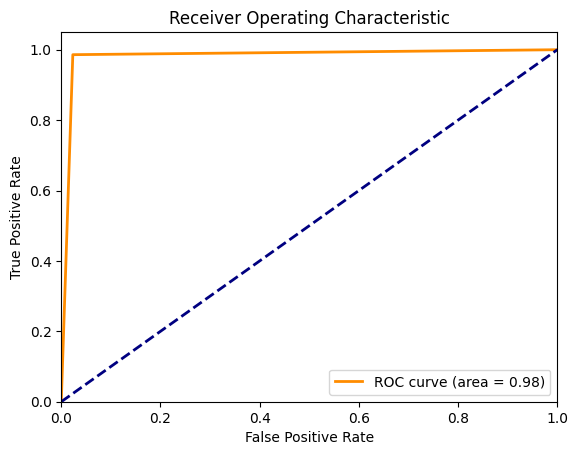

R2:  0.9253193580085162


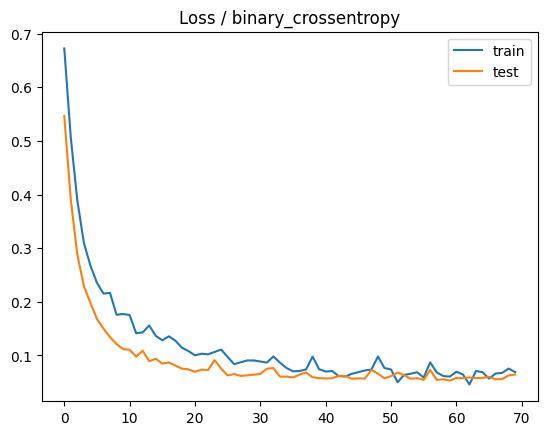

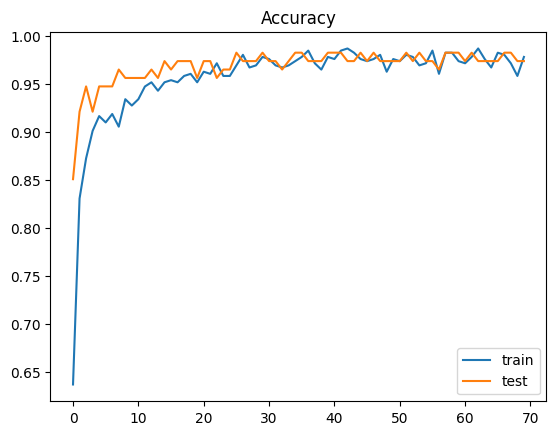

In [23]:
# Convierte las salidas en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'. 
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)

# learning curves
# plot loss during training
plt.title('Loss / binary_crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### 8. Guardar / cargar Modelo

In [24]:
# Guardar el modelo completo (arquitectura, pesos y configuración) en un archivo HDF5
model.save('RNA_model.h5.keras')
print("Modelo guardado.")
# Cargar el modelo desde el archivo HDF5
from tensorflow.keras.models import load_model
loaded_model = load_model('RNA_model.h5.keras')
print("Modelo cargado.")

Modelo guardado.
Modelo cargado.


### 9. Manejo de Shap


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


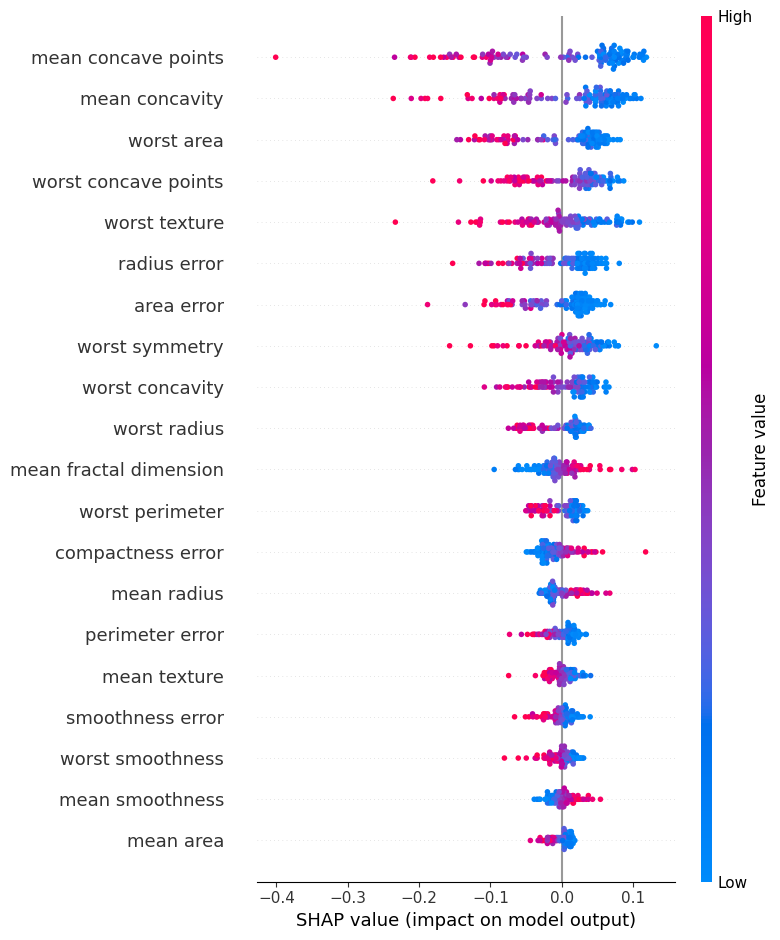

In [25]:
%pip install shap
# SHAP (SHapley Additive exPlanations) para explicar las predicciones de un modelo de machine learning.
import shap # pip install shap
# Crear un explainer de SHAP usando en conjunto de entrenamiento
explainer = shap.Explainer(model, X_train)
# Obtener las explicaciones SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test)
# Proporciona una visión general de la importancia de las características y su impacto en las predicciones.
shap.summary_plot(shap_values, X_test, feature_names=dataset.feature_names)